# Extracting condition-specific trials

The aim of this section is to extract the trials according to the trigger channel. It will be explained how the events can be generated from the stimulus channels and how condition-specific trials (epochs) can be extracted. Once the trials are extracted, bad epochs will be identified and excluded based on their peak-to-peak signal amplitude.

## Preparation
#### Import the necessary modules
Below are the required Python modules to be imported


In [1]:
import os.path as op
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne_bids import BIDSPath, read_raw_bids


#### File overview

The chapter relies on the input file (embedded in the BIDS structure):

< BIDS_ROOT >/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_ica.fif


< BIDS_ROOT >/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_ann.fif


and generates the output files

< BIDS_ROOT >/derivatives/Analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-12_epo.fif

Set the paths for the data and results. Note that these will depend on your local setup.


In [2]:
subject = '01'
session = '01'
task = 'SpAtt'
run = '01'
meg_suffix = 'meg'
ica_suffix = 'ica'
epo_suffix = 'epo'

data_path='C:/Users/rakshita/Documents/Cerca_raw_files'
bids_root = op.join(data_path, "Cerca_Spatt_BIDS")
deriv_root1 = op.join(bids_root, "derivatives/preprocessing")
deriv_root2=op.join(bids_root, "derivatives/analysis")

bids_path_preproc = BIDSPath(subject=subject, session=session,
            task=task, run=run, suffix=ica_suffix, datatype='meg',
            root=deriv_root1, extension='.fif', check=False)

bids_path = BIDSPath(subject=subject, session=session,
            task=task, run=run, suffix=epo_suffix, datatype='meg',
            root=deriv_root2, extension='.fif', check=False).mkdir()
  
deriv_fname = bids_path

print(bids_path_preproc.fpath)
print(deriv_fname)

C:\Users\rakshita\Documents\Cerca_raw_files\Cerca_Spatt_BIDS\derivatives\preprocessing\sub-01\ses-01\meg\sub-01_ses-01_task-SpAtt_run-01_ica.fif
C:/Users/rakshita/Documents/Cerca_raw_files/Cerca_Spatt_BIDS/derivatives/analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_epo.fif



## Reading the events from the stimulus channels

First read all the events from the stimulus channel (in our case, 'Trigger 1').


In [3]:
raw = read_raw_bids(bids_path=bids_path_preproc, extra_params={'preload':False},verbose=True)

Opening raw data file C:\Users\rakshita\Documents\Cerca_raw_files\Cerca_Spatt_BIDS\derivatives\preprocessing\sub-01\ses-01\meg\sub-01_ses-01_task-SpAtt_run-01_ica.fif...


C:\Users\rakshita\AppData\Local\Temp\ipykernel_10092\1308987296.py:1: RuntimeWarning: This filename (C:\Users\rakshita\Documents\Cerca_raw_files\Cerca_Spatt_BIDS\derivatives\preprocessing\sub-01\ses-01\meg\sub-01_ses-01_task-SpAtt_run-01_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = read_raw_bids(bids_path=bids_path_preproc, extra_params={'preload':False},verbose=True)


    Read a total of 8 projection items:
        HFC: l=1 m=-1 (1 x 176) active
        HFC: l=1 m=0 (1 x 176) active
        HFC: l=1 m=1 (1 x 176) active
        HFC: l=2 m=-2 (1 x 176) active
        HFC: l=2 m=-1 (1 x 176) active
        HFC: l=2 m=0 (1 x 176) active
        HFC: l=2 m=1 (1 x 176) active
        HFC: l=2 m=2 (1 x 176) active
    Range : 0 ... 1539807 =      0.000 ...  2053.076 secs
Ready.


C:\Users\rakshita\AppData\Local\Temp\ipykernel_10092\1308987296.py:1: RuntimeWarning: Did not find any events.tsv associated with sub-01_ses-01_task-SpAtt_run-01.

The search_str was "C:\Users\rakshita\Documents\Cerca_raw_files\Cerca_Spatt_BIDS\derivatives\preprocessing\sub-01\**\meg\sub-01_ses-01*events.tsv"
  raw = read_raw_bids(bids_path=bids_path_preproc, extra_params={'preload':False},verbose=True)
C:\Users\rakshita\AppData\Local\Temp\ipykernel_10092\1308987296.py:1: RuntimeWarning: Did not find any channels.tsv associated with sub-01_ses-01_task-SpAtt_run-01.

The search_str was "C:\Users\rakshita\Documents\Cerca_raw_files\Cerca_Spatt_BIDS\derivatives\preprocessing\sub-01\**\meg\sub-01_ses-01*channels.tsv"
  raw = read_raw_bids(bids_path=bids_path_preproc, extra_params={'preload':False},verbose=True)
C:\Users\rakshita\AppData\Local\Temp\ipykernel_10092\1308987296.py:1: RuntimeWarning: Did not find any meg.json associated with sub-01_ses-01_task-SpAtt_run-01.

The search_str was "

In [4]:
# Reading the events from the raw file
events, events_id = mne.events_from_annotations(raw,event_id='auto')

Used Annotations descriptions: ['blink', 'blkEnd', 'blkStart', 'catchOnset', 'cue_Left', 'cue_Right', 'dotOnLeft', 'dotOnRight', 'resp', 'stimOnset']


The code above extract the events from the trigger channel. This results are represented in the array events where the first column is the sample and the third column the corresponding trigger value. The events_id is a dictionary of event names and trigger codes.

#### To visualize a snippet of the events-array and event_id write:


In [5]:
events_id

{'blink': 1,
 'blkEnd': 2,
 'blkStart': 3,
 'catchOnset': 4,
 'cue_Left': 5,
 'cue_Right': 6,
 'dotOnLeft': 7,
 'dotOnRight': 8,
 'resp': 9,
 'stimOnset': 10}

In [6]:
events[100:120]

array([[78746,     0,     1],
       [79415,     0,     1],
       [79788,     0,     1],
       [80342,     0,     1],
       [80637,     0,     1],
       [80857,     0,     1],
       [81656,     0,     1],
       [82142,     0,     1],
       [82735,     0,     1],
       [83368,     0,     1],
       [84207,     0,     1],
       [84641,     0,     1],
       [84940,     0,     1],
       [85295,     0,     1],
       [86658,     0,     1],
       [86864,     0,     1],
       [87906,     0,     3],
       [88453,     0,     1],
       [90367,     0,     5],
       [91270,     0,    10]])

#### To visualize the events along with the time course in a browsing window, write the following code

In [7]:
%matplotlib inline
raw.plot(start=50)

Using qt as 2D backend.


<mne_qt_browser._pg_figure.MNEQtBrowser(0x1a2769fa9d0) at 0x000001A27C1FB580>

Waiting for Loading-Thread to finish... (max. 10 sec)


C:\Users\rakshita\AppData\Local\mne-python\1.9.0_0\Lib\site-packages\mne_qt_browser\_pg_figure.py:3061: RuntimeWarning: Failed to disconnect (None) from signal "triggered()".
  sig.disconnect()


Channels marked as bad:
['C1 A7 Y']


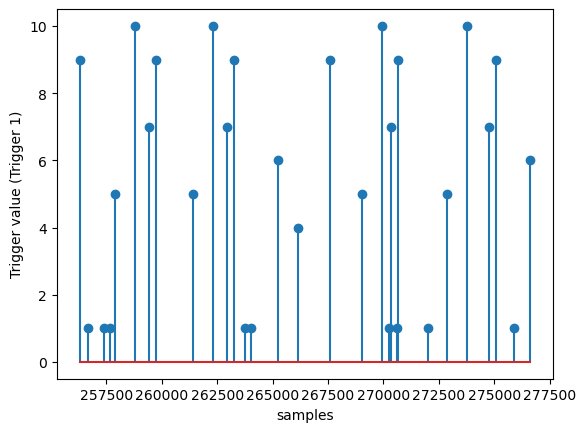

In [7]:
%matplotlib inline
plt.stem(events[:,0][350:380], events[:,2][350:380])
plt.xlabel('samples')
plt.ylabel('Trigger value (Trigger 1)')
plt.show()

The figures shows an example for part of the events array. The trigger values indicate specific events of the trials.


## Defining the epochs (trials) according to the event values

Next step is to extract the left and right trials of the data:


In [8]:
bids_path_preproc.update(run='01')
raw = read_raw_bids(bids_path=bids_path_preproc, 
                    extra_params={'preload': True}, 
                    verbose=True)
events, events_id = mne.events_from_annotations(raw, event_id='auto')

raw_list = [raw]
events_list = [events]

### Define event ids we are interested in
events_picks_id = {k: v for k, v in events_id.items() if k.startswith('cue')}

Opening raw data file C:\Users\rakshita\Documents\Cerca_raw_files\Cerca_Spatt_BIDS\derivatives\preprocessing\sub-01\ses-01\meg\sub-01_ses-01_task-SpAtt_run-01_ica.fif...


C:\Users\rakshita\AppData\Local\Temp\ipykernel_10092\1002298360.py:2: RuntimeWarning: This filename (C:\Users\rakshita\Documents\Cerca_raw_files\Cerca_Spatt_BIDS\derivatives\preprocessing\sub-01\ses-01\meg\sub-01_ses-01_task-SpAtt_run-01_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = read_raw_bids(bids_path=bids_path_preproc,


    Read a total of 8 projection items:
        HFC: l=1 m=-1 (1 x 176) active
        HFC: l=1 m=0 (1 x 176) active
        HFC: l=1 m=1 (1 x 176) active
        HFC: l=2 m=-2 (1 x 176) active
        HFC: l=2 m=-1 (1 x 176) active
        HFC: l=2 m=0 (1 x 176) active
        HFC: l=2 m=1 (1 x 176) active
        HFC: l=2 m=2 (1 x 176) active
    Range : 0 ... 1539807 =      0.000 ...  2053.076 secs
Ready.
Reading 0 ... 1539807  =      0.000 ...  2053.076 secs...
Used Annotations descriptions: ['blink', 'blkEnd', 'blkStart', 'catchOnset', 'cue_Left', 'cue_Right', 'dotOnLeft', 'dotOnRight', 'resp', 'stimOnset']


C:\Users\rakshita\AppData\Local\Temp\ipykernel_10092\1002298360.py:2: RuntimeWarning: Did not find any events.tsv associated with sub-01_ses-01_task-SpAtt_run-01.

The search_str was "C:\Users\rakshita\Documents\Cerca_raw_files\Cerca_Spatt_BIDS\derivatives\preprocessing\sub-01\**\meg\sub-01_ses-01*events.tsv"
  raw = read_raw_bids(bids_path=bids_path_preproc,
C:\Users\rakshita\AppData\Local\Temp\ipykernel_10092\1002298360.py:2: RuntimeWarning: Did not find any channels.tsv associated with sub-01_ses-01_task-SpAtt_run-01.

The search_str was "C:\Users\rakshita\Documents\Cerca_raw_files\Cerca_Spatt_BIDS\derivatives\preprocessing\sub-01\**\meg\sub-01_ses-01*channels.tsv"
  raw = read_raw_bids(bids_path=bids_path_preproc,
C:\Users\rakshita\AppData\Local\Temp\ipykernel_10092\1002298360.py:2: RuntimeWarning: Did not find any meg.json associated with sub-01_ses-01_task-SpAtt_run-01.

The search_str was "C:\Users\rakshita\Documents\Cerca_raw_files\Cerca_Spatt_BIDS\derivatives\preprocessing\sub

Set the peak-to-peak amplitude thresholds for trial rejection. These values may change depending on the quality of the data.

**@Prof. Ole: Should we move this to HFC or ICA Chapter???**

In [7]:
reject = dict(mag=4e-12)

We will use time-windows of interest starting 2.5 s prior to the stimulus onset and ending 2 s after. Now perform the epoching using the events and events_id as well as the selected channels:

In [9]:
## Make epochs
epochs = mne.Epochs(raw,
            events, events_picks_id,
            tmin=-2.5 , tmax=2,
            baseline=None,
            proj=False,
            picks = 'all',
            detrend = 1,
            #reject=reject,
            reject_by_annotation=True,
            preload=True,
            verbose=True)
## Show Epoch Details
epochs

Not setting metadata
360 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 8)
8 projection items activated
Using data from preloaded Raw for 360 events and 3376 original time points ...
7 bad epochs dropped


<Epochs | 353 events (all good), -2.5 – 2 s (baseline off), ~1.81 GiB, data loaded,
 'cue_Left': 174
 'cue_Right': 179>

By calling epochs we can check that the number of events is 353 of which 174 are left attention trials and 179 right attention trials. Moreover, we can see that no baseline correction was applied at this stage.

Now we plot an overview of the rejected epochs:


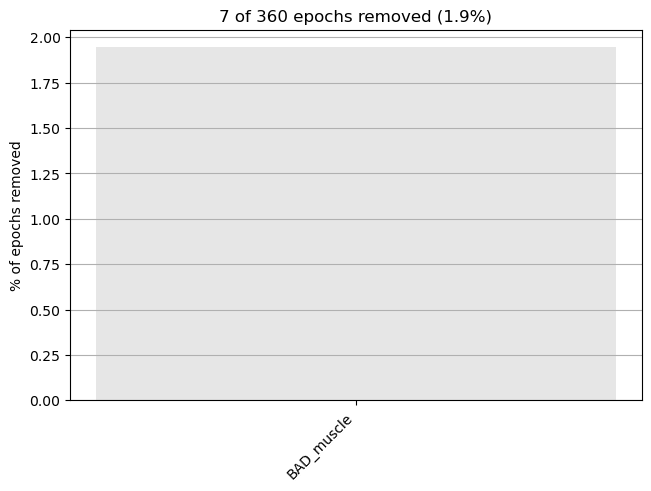

In [10]:
%matplotlib inline
epochs.plot_drop_log();



A small percentage of the trials were rejected due to artefacts in the magnetometers.

#### Now we save the epoched data in an FIF-file. 



In [11]:
print(deriv_fname)

C:/Users/rakshita/Documents/Cerca_raw_files/Cerca_Spatt_BIDS/derivatives/analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_epo.fif


In [12]:
epochs.save(deriv_fname, overwrite=True)

[WindowsPath('C:/Users/rakshita/Documents/Cerca_raw_files/Cerca_Spatt_BIDS/derivatives/analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_epo.fif')]


## Plotting the trials

#### To show the trials for the left-condition for the OPM sensors:


In [16]:
epochs['cue_Left'].plot(n_epochs=10, picks=['mag'])

<mne_qt_browser._pg_figure.MNEQtBrowser(0x24b92883b50) at 0x0000024B94E86280>


The plot above shows 10 trials of type left.

Showing the trigger channels is often useful for verifying that correct trials have been selected. Note that Trigger 1 is the trigger channel here. 

#### To show the trigger (stimulus channels) write:


In [17]:
epochs['cue_Left'].plot(n_epochs=1, picks=['Trigger 1'])

<mne_qt_browser._pg_figure.MNEQtBrowser(0x227947b2aa0) at 0x00000227999D6240>

C:\Users\rakshita\AppData\Local\mne-python\1.9.0_0\Lib\site-packages\mne_qt_browser\_pg_figure.py:3061: RuntimeWarning: Failed to disconnect (None) from signal "triggered()".
  sig.disconnect()


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


#### To show all the trials belonging to left for a representative OPM Sensor (O9 G3 Z) use the plot_image function. In the following example we also lowpass filter the indvidual trials at 30 Hz and shorten them (crop) to a -100 to 400 ms interval:


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (0.441 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    2.9s
[Parallel(n_job

Not setting metadata
174 matching events found
No baseline correction applied
0 projection items activated


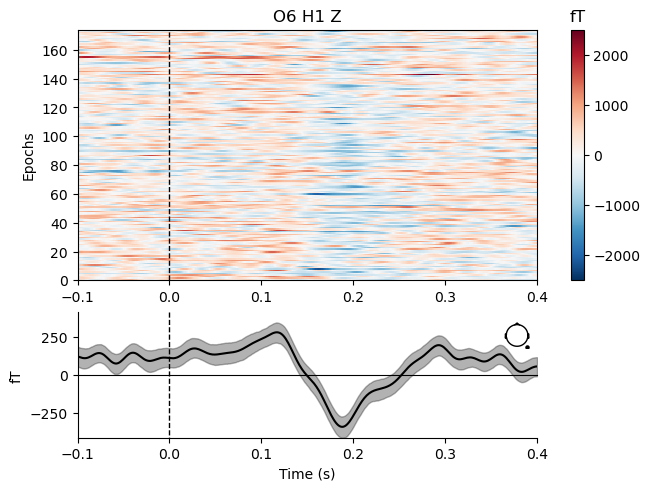

[<Figure size 640x480 with 4 Axes>]

In [25]:
%matplotlib inline
epochs['cue_Left'].filter(0.0,30).crop(-0.1,0.4).plot_image(picks=['O6 H1 Z'], vmin=-2500, vmax=2500)

## Preregistration and Publications

"Trials were extracted from the continuous data from –2.5 to 2 seconds around each event. No baseline correction was applied. A linear detrend was used to remove slow drifts. All channels were included, and bad trials were automatically excluded based on annotations. The data were preloaded for further analysis."

## References